# Road Length for Grid Emissions Modeling Domain

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np

In [3]:
path = '../2_Emissions_inventory/LAPAt_mod/'
#df3 = pd.read_csv(path+'grid03km_d02.csv')
#df15 = pd.read_csv(path+'grid15km_d01.csv')

# The following file works with wrfchemi_cbmz.ncl
s5 = pd.read_csv('../2_Emissions_inventory/.old/s5.txt', delim_whitespace=True)

In [6]:
s5.roadLength.max()

554

(0, 800)

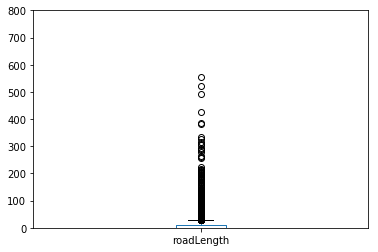

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
s5['roadLength'].plot(kind='box')
plt.ylim([0,800])

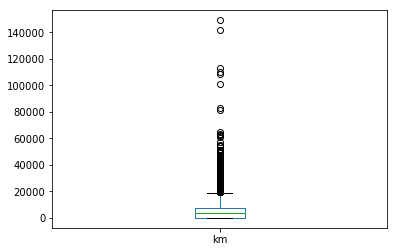

In [13]:
df15['km'] = df15['vehroads_s']/1E3
df15.km.plot(kind='box');

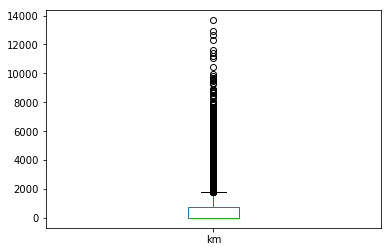

In [14]:
df3['km'] = df3['vehroads_s']/1E3
df3.km.plot(kind='box')

## Calculate nx and ny for each grid resolution

For the grid domain of 3 km of spatial resolution:

In [8]:
print("nx: ", df3.Xlon.nunique()) ; print("ny: ",df3.Ylat.nunique())

AttributeError: 'DataFrame' object has no attribute 'Xlon'

For the grid domain of 15 km of spatial resolution:

In [6]:
print("nx: ", df15.Xlon.nunique()) ; print("ny: ",df15.Ylat.nunique())

nx:  103
ny:  63


In [7]:
print("nx: ", s5.Xlon.nunique()) ; print("ny: ",s5.Ylat.nunique())

nx:  149
ny:  99


## Write files as *.txt

In [8]:
def order(df=df3):
    df.loc[:,'id']=range(len(df.id))
    df = df[['id','Xlon','Ylat','vehroads_s']]
    df = df.round({"id":0,"Xlon":5, "Ylat":5, "vehroads_s":3})
    df = df.sort_values(by=['Ylat','Xlon'],ascending=[False,True])
    df.loc[:,'id']=np.arange(0.0,len(df.id))
    return df

df3 = order(df=df3); df15 = order(df=df15)

In [9]:
def vias(fname = 'grid3km_d02.txt',file = df3):
    np.savetxt(path+fname, file, delimiter='  ',  
           fmt= ['%12.0f', '%5.5f', '%14.5f','%15.3f'])
vias()
vias(fname='grid15km_final.txt', file=df15)

In [20]:
ls

CO_emissions_d01.pdf           SEEG_2010_total.pdf
CO_emissions_d02.pdf           SEEG_2018_ind.pdf
Emissions_Map.ipynb            edgar_htap.py
Emissions_wrfchemi.ipynb       total_emiss.py
Fleet and Use intensity.ipynb  wrfchemi_00z_d01_total.nc
README.md                      wrfchemi_00z_d02_total.nc
Road_Length.ipynb              wrfchemi_12z_d01_total.nc
SEEG_2010_2018.pdf             wrfchemi_12z_d02_total.nc
SEEG_2010_ind.pdf
